In [1]:
##This code uses the file "HW_StackAE_FashionMNIST"
#provided in class as a baseline

import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
from PIL import Image, ImageOps
from tensorflow.keras.utils import to_categorical
import math

dirpath='/Users/anuli/Documents/UTKFace/'
allimages=os.listdir(dirpath)


race=[]
images=[]
gender=[]

for Y in range(len(allimages)):
    demos = allimages[Y].split('_')
    if(int(demos[2])==1):
        images.append(allimages[Y])
        race.append(int(demos[2]))
        gender.append(int(demos[1]))
              

df = pd.DataFrame()
df['image'], df['race'], df['gender']= images, race, gender
df.head()

,image,race,gender
0,36_0_1_20170117163203851.jpg.chip.jpg,1,0
1,52_0_1_20170117161018159.jpg.chip.jpg,1,0
2,26_1_1_20170103181931657.jpg.chip.jpg,1,1
3,25_0_1_20170116002302626.jpg.chip.jpg,1,0
4,10_0_1_20170110223848885.jpg.chip.jpg,1,0


In [2]:
def extraction(images):

    features = []

    for img in images:
        pic = Image.open(dirpath+img)
        pic = ImageOps.grayscale(pic)
        pic = pic.resize((128,128))
        pic = np.array(pic)
        features.append(pic)
    features = np.array(features)
    features = features.reshape(len(features), 16384)
    return features

In [3]:
features = extraction(df['image'])

In [4]:
age=np.array(df['gender']).astype(float)

input_shape = (128,128,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, age, train_size=0.7, stratify = gender, shuffle = True, random_state=2)
print(x_train.shape)
print(x_test.shape)

(3168, 16384)
(1358, 16384)


[0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.]


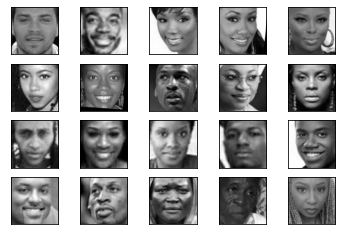

In [5]:
for i in range(20):
  X_img = x_train[i].reshape(128,128)
  plt.subplot(4,5,i+1)
  fig = plt.imshow(X_img,cmap='gray')
  fig.axes.get_xaxis().set_visible(False)
  fig.axes.get_yaxis().set_visible(False)

print(y_train[0:20])
plt.show()  

x_train = (x_train.astype('float32')/255).reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = (x_test.astype('float32')/255).reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
np.random.seed(0)
hiddenSize1 = 100

In [7]:
in_size = 16384
in_img = keras.Input(shape=(in_size,))
encoded = layers.Dense(hiddenSize1, activation='sigmoid',name='Encoder')(in_img) # Encoder Layer
decoded = layers.Dense(in_size, activation='sigmoid', name = 'Decoder')(encoded)  # decoder layer

autoencoder = keras.Model(in_img, decoded)
encoder = keras.Model(in_img, encoded)
autoencoder.compile(optimizer='adam', loss='MeanSquaredError')

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
13/13 [==============================] - 3s 97ms/step - loss: 0.0512
Epoch 2/50
13/13 [==============================] - 1s 93ms/step - loss: 0.0459
Epoch 3/50
13/13 [==============================] - 1s 90ms/step - loss: 0.0453
Epoch 4/50
13/13 [==============================] - 1s 98ms/step - loss: 0.0451
Epoch 5/50
13/13 [==============================] - 1s 99ms/step - loss: 0.0449
Epoch 6/50
13/13 [==============================] - 1s 92ms/step - loss: 0.0448
Epoch 7/50
13/13 [==============================] - 1s 96ms/step - loss: 0.0447
Epoch 8/50
13/13 [==============================] - 1s 99ms/step - loss: 0.0446
Epoch 9/50
13/13 [==============================] - 1s 97ms/step - loss: 0.0444
Epoch 10/50
13/13 [==============================] - 1s 97ms/step - loss: 0.0443
Epoch 11/50
13/13 [==============================] - 1s 97ms/step - loss: 0.0442
Epoch 12/50
13/13 [==============================] - 1s 91ms/step - loss: 0.0441
Epoch 13/50
13/13 [==================

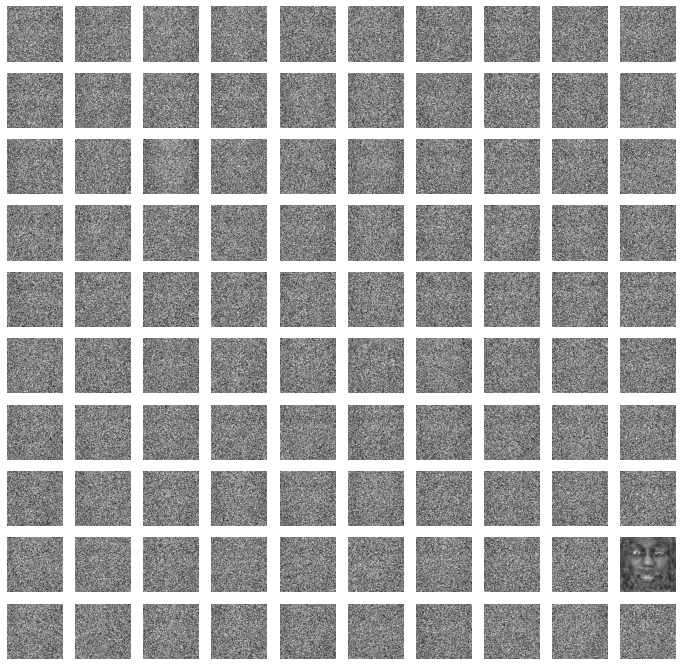

In [9]:
n_cols = math.ceil(hiddenSize1 / 10)
fig = plt.figure(figsize=(12,12))


for i in range(hiddenSize1):
  w = autoencoder.layers[1].get_weights()[0][:,i].reshape(128,128)
  plt.subplot(n_cols, 10, i+1)
  plt.imshow(w,cmap='gray')
  plt.axis("off")
  
plt.show()

In [10]:
feat1 = encoder.predict(x_train)
hiddenSize2 = 25

99/99 [==============================] - 0s 3ms/step


In [11]:
in_img2 = keras.Input(shape=(hiddenSize1,))
encoded2 = layers.Dense(hiddenSize2, activation='sigmoid',name="Encoder_2")(in_img2)
decoded2 = layers.Dense(hiddenSize1, activation='sigmoid',name= "Decoder_2")(encoded2)

autoencoder2 = keras.Model(in_img2, decoded2)
encoder2 = keras.Model(in_img2, encoded2)
autoencoder2.compile(optimizer='adam', loss='MeanSquaredError')


autoencoder2.fit(feat1, feat1, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
13/13 [==============================] - 0s 2ms/step - loss: 0.2392
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1858
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.1341
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0912
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0427
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0309
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 11/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 12/50
13/13 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 13/50
13/13 [==============================

In [13]:
feat2 = encoder2.predict(feat1)

99/99 [==============================] - 0s 897us/step


In [14]:
soft_in = keras.Input(shape=(hiddenSize2,))
soft_layer = layers.Dense(2,activation='softmax', name="Softmax")(soft_in)

softnet = keras.Model(soft_in, soft_layer)
softnet.compile(optimizer='adam', loss='MeanSquaredError')

softnet.fit(feat2, y_train, epochs=50, batch_size=256,shuffle=True)

Epoch 1/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4498
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4087
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3430
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.2750
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.2508
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.2514
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.2503
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 11/50
13/13 [==============================] - 0s 3ms/step - loss: 0.2500
Epoch 12/50
13/13 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 13/50
13/13 [==============================

In [16]:
enc1 = encoder.predict(x_test)
enc2 = encoder2.predict(enc1)
y_out = softnet.predict(enc2)
y_classified = np.argmax(y_out, axis=1)
print(y_test)
y_classified

43/43 [==============================] - 0s 3ms/step
[1. 1. 0. ... 0. 1. 1.]


array([1, 1, 0, ..., 0, 1, 1])

In [17]:
layer1 = layers.Dense(hiddenSize1, activation='sigmoid')(stacked_in)
layer2 = layers.Dense(hiddenSize2, activation='sigmoid')(layer1)
layer3 = layers.Dense(2, activation='softmax')(layer2)

stacked_ae = keras.Model(stacked_in, layer3)
stacked_ae.compile(optimizer="adam", loss = "MeanSquaredError")
 
stacked_ae.layers[0].set_weights(autoencoder.layers[0].get_weights())
stacked_ae.layers[1].set_weights(autoencoder.layers[1].get_weights())
stacked_ae.layers[2].set_weights(autoencoder2.layers[1].get_weights())
stacked_ae.layers[3].set_weights(softnet.layers[1].get_weights())

In [19]:
def plot_confusion_matrix(y_classified, y_true):
  c_mat = np.zeros((2,2))
  for i in range(len(y_true)):
    c_mat[y_classified[i], int(y_true[i])] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  accuracy = (np.sum(np.logical_and(y_classified, y_true))/ len(y_true)) * 100

  plt.figure(figsize=(12,10))
  sns.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class \n Accuracy: ' + '%.2f'%accuracy + "%")

43/43 [==============================] - 0s 6ms/step


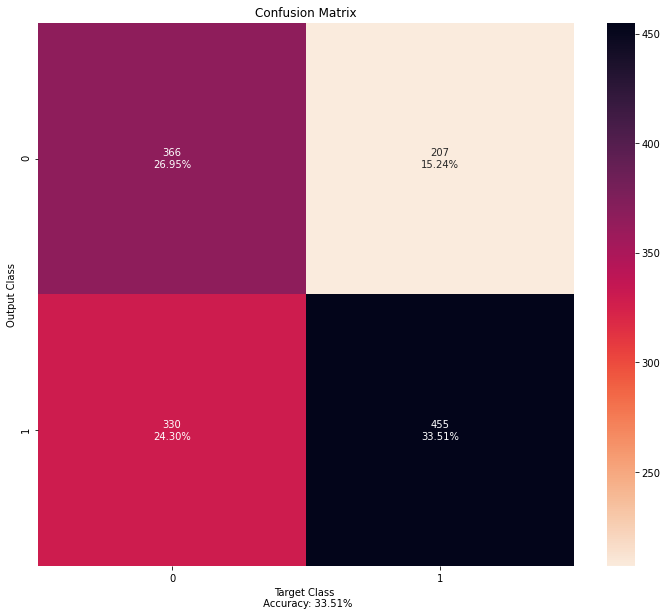

In [20]:
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

In [21]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)

Epoch 1/20
13/13 [==============================] - 2s 40ms/step - loss: 0.2501
Epoch 2/20
13/13 [==============================] - 1s 40ms/step - loss: 0.2502
Epoch 3/20
13/13 [==============================] - 0s 35ms/step - loss: 0.2500
Epoch 4/20
13/13 [==============================] - 0s 32ms/step - loss: 0.2497
Epoch 5/20
13/13 [==============================] - 0s 30ms/step - loss: 0.2497
Epoch 6/20
13/13 [==============================] - 0s 30ms/step - loss: 0.2494
Epoch 7/20
13/13 [==============================] - 0s 32ms/step - loss: 0.2484
Epoch 8/20
13/13 [==============================] - 0s 28ms/step - loss: 0.2476
Epoch 9/20
13/13 [==============================] - 0s 30ms/step - loss: 0.2461
Epoch 10/20
13/13 [==============================] - 0s 27ms/step - loss: 0.2440
Epoch 11/20
13/13 [==============================] - 0s 27ms/step - loss: 0.2399
Epoch 12/20
13/13 [==============================] - 0s 27ms/step - loss: 0.2350
Epoch 13/20
13/13 [==================

43/43 [==============================] - 0s 5ms/step


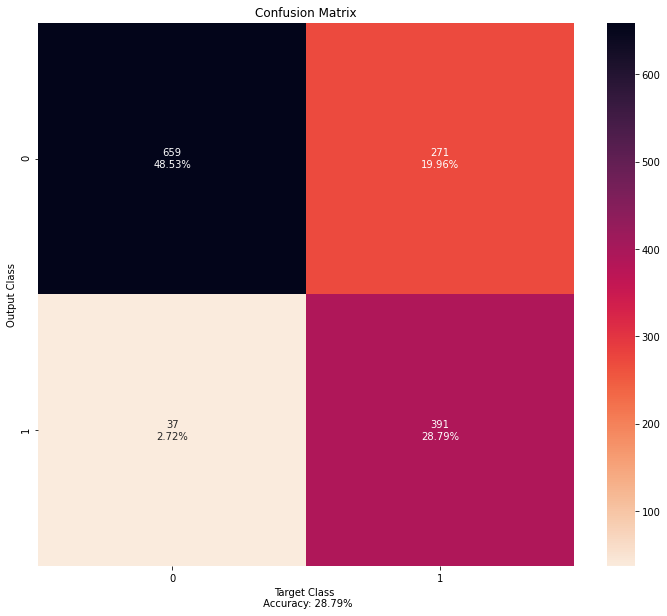

In [22]:
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Epoch 1/20
13/13 [==============================] - 0s 31ms/step - loss: 0.1848
Epoch 2/20
13/13 [==============================] - 0s 31ms/step - loss: 0.1772
Epoch 3/20
13/13 [==============================] - 1s 39ms/step - loss: 0.1753
Epoch 4/20
13/13 [==============================] - 0s 31ms/step - loss: 0.1672
Epoch 5/20
13/13 [==============================] - 0s 30ms/step - loss: 0.1540
Epoch 6/20
13/13 [==============================] - 1s 44ms/step - loss: 0.1484
Epoch 7/20
13/13 [==============================] - 1s 47ms/step - loss: 0.1427
Epoch 8/20
13/13 [==============================] - 1s 40ms/step - loss: 0.1384
Epoch 9/20
13/13 [==============================] - 1s 47ms/step - loss: 0.1438
Epoch 10/20
13/13 [==============================] - 1s 45ms/step - loss: 0.1282
Epoch 11/20
13/13 [==============================] - 1s 49ms/step - loss: 0.1232
Epoch 12/20
13/13 [==============================] - 1s 41ms/step - loss: 0.1196
Epoch 13/20
13/13 [==================

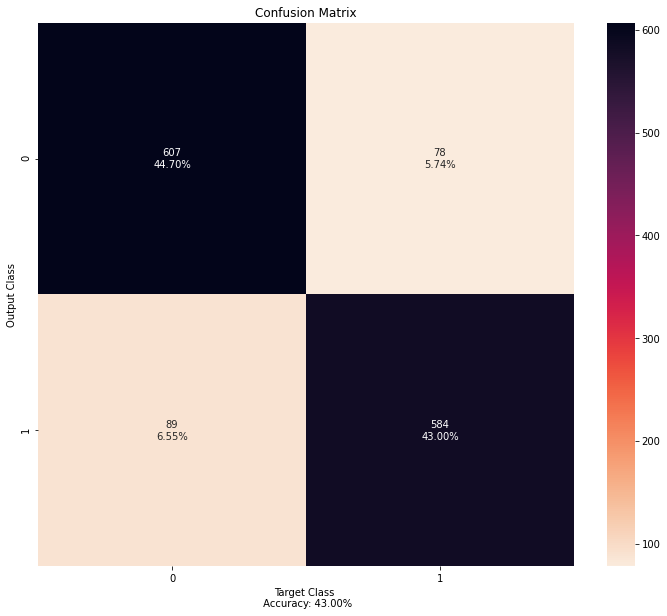

In [23]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)

Epoch 1/20
13/13 [==============================] - 0s 31ms/step - loss: 0.0945
Epoch 2/20
13/13 [==============================] - 0s 29ms/step - loss: 0.0989
Epoch 3/20
13/13 [==============================] - 0s 30ms/step - loss: 0.0976
Epoch 4/20
13/13 [==============================] - 1s 40ms/step - loss: 0.0927
Epoch 5/20
13/13 [==============================] - 1s 51ms/step - loss: 0.0903
Epoch 6/20
13/13 [==============================] - 1s 46ms/step - loss: 0.0876
Epoch 7/20
13/13 [==============================] - 1s 46ms/step - loss: 0.0872
Epoch 8/20
13/13 [==============================] - 1s 41ms/step - loss: 0.0871
Epoch 9/20
13/13 [==============================] - 1s 41ms/step - loss: 0.0852
Epoch 10/20
13/13 [==============================] - 1s 38ms/step - loss: 0.0851
Epoch 11/20
13/13 [==============================] - 0s 36ms/step - loss: 0.0810
Epoch 12/20
13/13 [==============================] - 0s 37ms/step - loss: 0.0901
Epoch 13/20
13/13 [==================

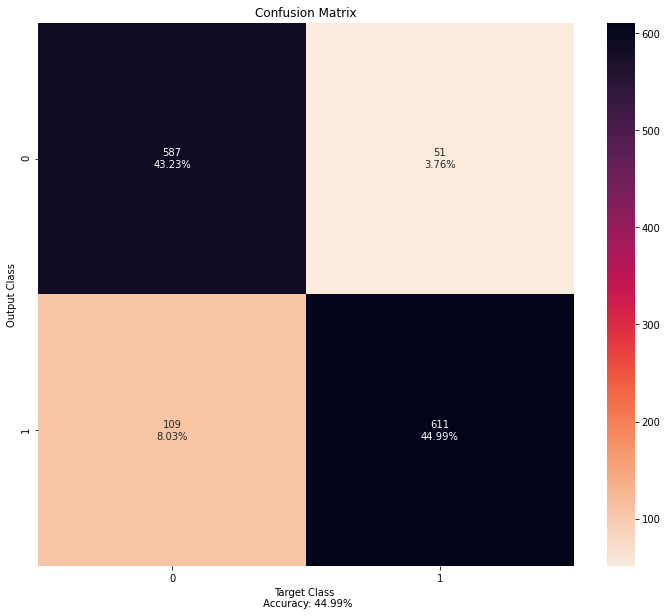

In [24]:
stacked_ae.fit(x_train, to_categorical(y_train), epochs=20, batch_size = 256, shuffle=True)
y_stacked = stacked_ae.predict(x_test)
y_classified = np.argmax(y_stacked, axis=1)

plot_confusion_matrix(y_classified, y_test)